In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib.ticker import MaxNLocator, LogLocator, AutoMinorLocator # custom tick locators for plots

# matplotlib default customizations
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color = ['blue','green','red',
                                           'cyan','magenta','orange','olive',
                                          'yellow', 'palegreen','black',])
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.titlesize'] = 8
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['figure.subplot.hspace'] = 0.5
mpl.rcParams['figure.subplot.wspace'] = 0.5
mpl.rcParams['font.size'] = 8
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 6
mpl.rcParams['legend.fontsize'] = 6
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

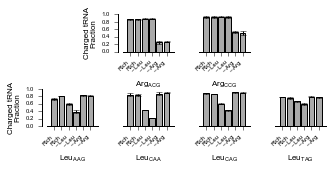

In [22]:
csvfiles = filter(lambda x: x.endswith('csv'), os.listdir('../processeddata/'))

fig = plt.figure()

axcount = 1
for File in sorted(csvfiles):
    data = pd.read_csv('../processeddata/' + File)
    data = data.rename(columns={'sterr':'stderr'})
    data = data[data['cell_line'].apply(lambda x: x.find('RagB-WT') == -1)]
    data = data.sort_values(by=['samplelabel','cell_line'], ascending = False)
    trna = File.split('_')[0]
    aa = trna[:3].capitalize()
    anticodon = trna[3:].upper()
    if anticodon in ['TCG','TAA','TRNAS']:
        continue
    axcount += 1
    if axcount == 4:
        axcount += 1
    ax = fig.add_subplot(2,4,axcount)
    #mpl.rcParams['savefig.dpi'] = 144

    xlocations = range(len(data))
    ax.bar(xlocations, data['mean_chargedfraction'], align='center', color = 'darkgrey' )
    ax.errorbar(xlocations, data['mean_chargedfraction'], 
                data['stderr'], linestyle='None', color = 'black' )

    spineOffset = {'left': 5, 'bottom': 0}    
    [ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
         else spine.set_color('none') for loc, spine in ax.spines.items() ]         
    ax.xaxis.set( ticks_position = 'bottom')
    ax.yaxis.set( ticks_position = 'left')
    ax.yaxis.set( major_locator = MaxNLocator(5) )

    ax.set_xlabel(aa + '$_{' + anticodon + '}$')
    ax.set_xticks(xlocations)
    ax.set_xticklabels(data['samplelabel'].apply(lambda x: x.split(' ')[0].replace('-',u'– ')), rotation=45, ha='right')
    ax.set_ylim(0,1)
    if axcount in [2,5]:
        ax.set_ylabel( 'Charged tRNA\nFraction')
    else:
        [ spine.set_color('none') for loc, spine in ax.spines.items() if loc in ['left'] ]
        ax.yaxis.set( ticks = [])
    ax.xaxis.set( ticks_position = 'bottom')
    
fig.set_size_inches([5,2])
fig.subplots_adjust(wspace = 0.5, hspace = 1)
fig.savefig('../figures/ragq99l_alltrnas.svg')